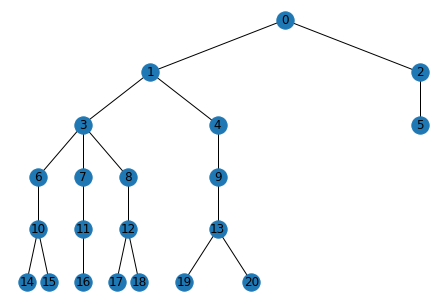

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IG_lib import isomers_generator, tree_image, mol_graph_image, atoms_property
from rdkit import Chem
from rdkit.Chem import AllChem 
from mol_lib import MolFromGraphs
import matplotlib
size = (160, 160)

n_h = 5
n_c = 2
n_o = 1
n_n = 0

n_t = n_h + n_c + n_o + n_n

if n_h == 0:
    h = ''
else:
    h = "H" + str(n_h)
if n_c == 0:
    c = ''
else:
    c = "C" + str(n_c)
if n_o == 0:
    o = ''
else:
    o = "O" + str(n_o)
if n_n == 0:
    n = ''
else:
    n = "N" + str(n_n)    

name  = h + c + n + o 

tree = isomers_generator(n_h,n_c,n_o,n_n)

tree_image(tree) #function to print the image of tree

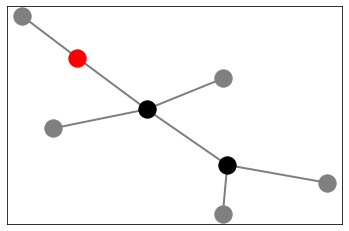

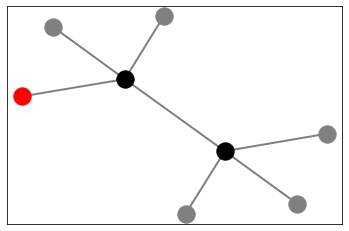

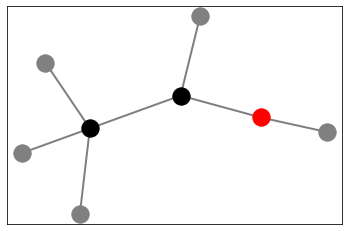

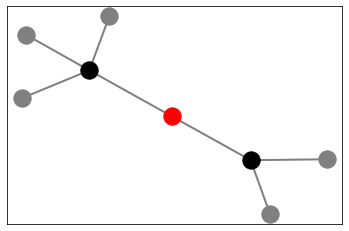

In [10]:
struct = []
for i,node in enumerate(tree):
    if tree.nodes[i]['block'] == 'hydrogen':
        struct.append(tree.nodes[i]['graph'].copy())
        mol_graph_image(tree.nodes[i]['graph'].copy()) 

In [ ]:
mols = []
for i,item in enumerate(struct):
    tmp_mol = MolFromGraphs(item)
    tmp_sml = Chem.MolToSmiles(tmp_mol)
    #print(tmp_sml)
    #fig = Chem.Draw.MolToMPL(tmp_mol, size=size, sanitaze=False)
    AllChem.EmbedMolecule(tmp_mol)
    AllChem.UFFOptimizeMolecule(tmp_mol)
    tmp_mol.SetProp('_Name',tmp_sml)
    tmp_name = name + '_' + str(i) + '.mol'
    mols.append(tmp_name[:-4])
    with open(tmp_name, "w+") as file_mol:
        file_mol.write(Chem.MolToMolBlock(tmp_mol))
    if tmp_mol.GetNumAtoms() != n_t:
        print('Error: number atoms in rdkit transformation to mol not conserved')
    '''    
    with open(tmp_name,"r") as file_mol:
        mol = file_mol.read()
        mol = Chem.rdmolfiles.MolFromMolBlock(mol,removeHs=False)
    fig = Chem.Draw.MolToMPL(mol, size=size)
    '''

In [ ]:
import os
main  = os.getcwd()

for i,item in enumerate(mols):
    name = item
    os.system("mkdir " + name)
    os.system("mv " + name + ".mol " + name)
    os.chdir(name)
    os.system("xtb " + name + ".mol "+ "--acc " + "0.2 " +  "--iterations "  + "1000 " +  "--opt " + "--namespace " + name + " > " + name + ".out output.out" )
    os.chdir(main)
